#DANE CNVP2018 - Vulnerability and MPI


This is the geoestadistic data from 2018 national population census, available on DANE web page ([CNVP2018](https://www.dane.gov.co/files/geoportal-provisional/index.html)).

From this data, we can get geometry of cities and blocks, in addition to the vulnerability and multidimensional poverty index (MPI) per block

In [1]:
#Install the necessary libraries
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Mouth drive  
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Import libraries
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import geopandas as gpd

%matplotlib inline
sns.set()
pd.options.display.max_columns = 100


#Vulnerability

In [4]:
#Load vulnerability and IPM data, related with georeferenced blocks polygons
vulnerabilidad = gpd.read_file('/content/drive/MyDrive/Team 111 DS4A - Project/Data/SHP_VULNRB_IPMxMZ')

In [6]:
#This dataset has many rows because it has information for many blocks in all the cities of Colombia.
vulnerabilidad.shape

(504996, 8)

In [7]:
#Lets see contained information
vulnerabilidad.head()

,COD_DPTO,COD_MPIO,COD_DANE,CATEGORIA,LABEL,ipm,embarazo_a,geometry
0,05,05001,0500110000000001010101,5.0,Vulnerabilidad baja,39.4,Vulnerabilidad media-alta,"POLYGON ((-75.54267 6.30182, -75.54262 6.30175..."
1,05,05001,0500110000000001010104,5.0,Vulnerabilidad baja,25.9,Vulnerabilidad media-alta,"POLYGON ((-75.54237 6.29968, -75.54235 6.29965..."
2,05,05001,0500110000000001010105,2.0,Vulnerabilidad media-baja,14.1,Vulnerabilidad media-baja,"POLYGON ((-75.54280 6.29964, -75.54277 6.29959..."
3,05,05001,0500110000000001010108,2.0,Vulnerabilidad media-baja,26.8,Vulnerabilidad media-baja,"POLYGON ((-75.54386 6.29974, -75.54386 6.29975..."
4,05,05001,0500110000000001010110,5.0,Vulnerabilidad baja,42.2,Vulnerabilidad baja,"POLYGON ((-75.54369 6.30214, -75.54369 6.30213..."


In [8]:
#For our project only Bucaramanga, Piedecuesta, Girón and Floridablanca are cities of interest

#From a previous exploration we know that COD_MPIO for Bucaramanga, Piedecuesta, Girón and Floridablanca are 68001, 68547, 68307 and 68276 respectively.
#Let's select vulnerability for this cities only (Bucaramanga metropolitan area)
lista_cod_municipios = ['68307', '68276', '68547', '68001']
vulnerabilidad_manzanas_area_bucaramanga = vulnerabilidad[vulnerabilidad['COD_MPIO'].isin(lista_cod_municipios)]
vulnerabilidad_manzanas_area_bucaramanga.shape

(11475, 8)

In [9]:
#Show info for this dataset
vulnerabilidad_manzanas_area_bucaramanga.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 11475 entries, 381204 to 404084
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   COD_DPTO    11475 non-null  object  
 1   COD_MPIO    11475 non-null  object  
 2   COD_DANE    11475 non-null  object  
 3   CATEGORIA   11475 non-null  float64 
 4   LABEL       10859 non-null  object  
 5   ipm         11475 non-null  float64 
 6   embarazo_a  9526 non-null   object  
 7   geometry    11475 non-null  geometry
dtypes: float64(2), geometry(1), object(5)
memory usage: 806.8+ KB


In [17]:
#There are some NaN in dataset
vulnerabilidad_manzanas_area_bucaramanga.isna().sum()

COD_DPTO         0
COD_MPIO         0
COD_DANE         0
CATEGORIA        0
LABEL          616
ipm              0
embarazo_a    1949
geometry         0
dtype: int64

In [10]:
vulnerabilidad_manzanas_area_bucaramanga.head()

,COD_DPTO,COD_MPIO,COD_DANE,CATEGORIA,LABEL,ipm,embarazo_a,geometry
381204,68,68001,6800110000000001010102,4.0,Vulnerabilidad baja,9.2,Vulnerabilidad media-baja,"POLYGON ((-73.13233 7.15481, -73.13233 7.15469..."
381205,68,68001,6800110000000001010115,4.0,Vulnerabilidad baja,13.8,Vulnerabilidad media,"POLYGON ((-73.13330 7.15650, -73.13330 7.15650..."
381206,68,68001,6800110000000001010116,3.0,Vulnerabilidad media-alta,15.4,Vulnerabilidad media-baja,"POLYGON ((-73.13355 7.15565, -73.13362 7.15560..."
381207,68,68001,6800110000000001010117,2.0,Vulnerabilidad media-baja,13.4,Vulnerabilidad baja,"POLYGON ((-73.13275 7.15587, -73.13271 7.15581..."
381208,68,68001,6800110000000001010118,2.0,Vulnerabilidad media-baja,11.2,Vulnerabilidad media-alta,"POLYGON ((-73.13368 7.15504, -73.13373 7.15501..."


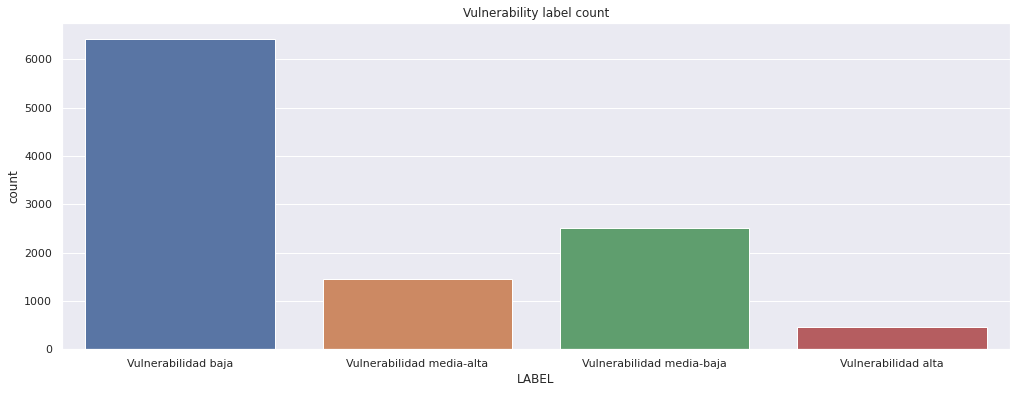

In [13]:
plt.figure(figsize = (17, 6))
sns.countplot(x='LABEL', data=vulnerabilidad_manzanas_area_bucaramanga)
plt.title("Vulnerability label count");
#Most blocks had low vulnerability in 2018

#MPI (multidimensional poverty index) per block
How is MPI calculated?
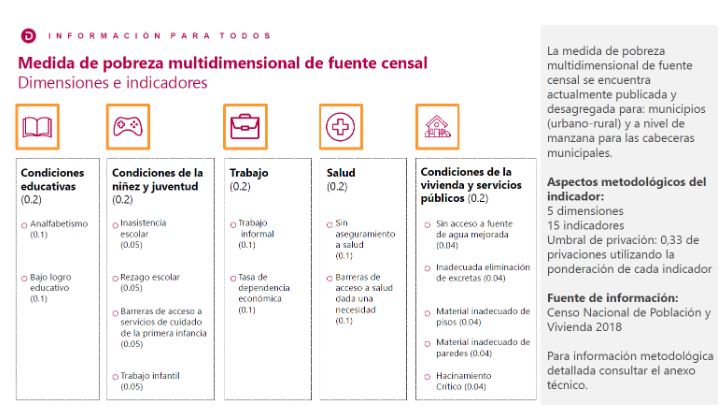

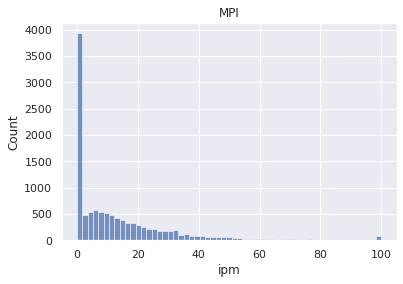

In [18]:
#Lets see MPI histogram to see distribution. The higher, the more poverty

sns.histplot(x='ipm', data=vulnerabilidad_manzanas_area_bucaramanga)
plt.title("MPI");

#There are many blocks with 0 MPI, perhaps due to lack of information

Text(0.5, 1.0, 'Vulnerability per block for Bucaramanga metropolitan area - DANE CNPV2018')

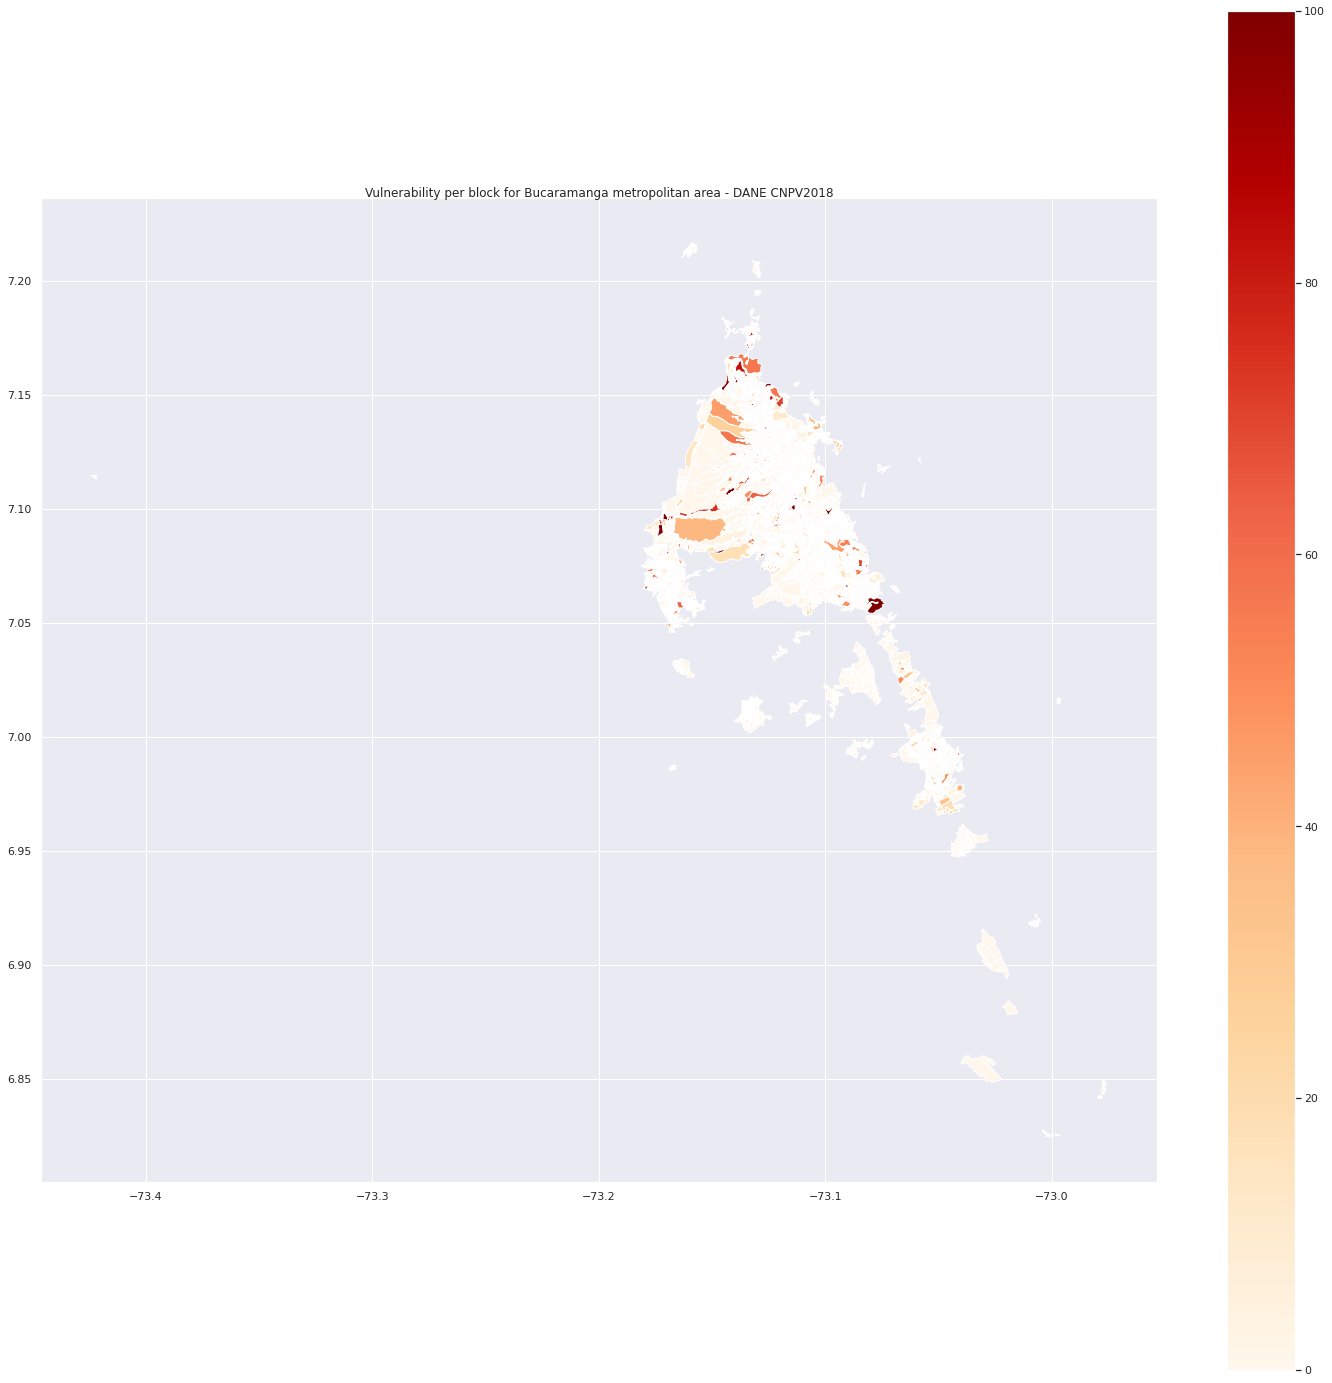

In [22]:
#Show vulnerability georeferenced data for Bucaramanga metropolitan area
fig, ax = plt.subplots(1, 1, figsize=(25, 25))
vulnerabilidad_manzanas_area_bucaramanga.plot(ax=ax, column='ipm', legend=True, cmap='OrRd')
plt.title(label='Vulnerability per block for Bucaramanga metropolitan area - DANE CNPV2018', 
          fontweight=10, 
          pad='2.0')

We already have information and polygons by blocks, now we are going to load the polygons of the cities and neighborhoods of Bucaramanga

#Shapes

Shapes were downloaded from [Dane MNG 2021](https://geoportal.dane.gov.co/servicios/descarga-y-metadatos/descarga-mgn-marco-geoestadistico-nacional/)




In [24]:
#First we are going to load shapefiles of Colombian cities
municipios = gpd.read_file('/content/drive/MyDrive/Team 111 DS4A - Project/Data/MGN2021_MUNICIPIO')

In [25]:
municipios.head()

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry
0,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,1.032546,0.030606,"POLYGON ((-75.66974 6.37360, -75.66965 6.37360..."
1,05,002,05002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,1.158504,0.041384,"POLYGON ((-75.46938 5.94575, -75.46897 5.94571..."
2,05,004,05004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,0.812183,0.024248,"POLYGON ((-76.08351 6.75050, -76.08325 6.75048..."
3,05,021,05021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,0.705200,0.010535,"POLYGON ((-75.03320 6.41586, -75.03313 6.41585..."
4,05,030,05030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,0.445241,0.006867,"POLYGON ((-75.67587 6.08561, -75.67540 6.08491..."


In [26]:
municipios.shape

(1121, 13)

In [29]:
#There are 1121 shapes, but we only need 4 corresponding to the metropolitan area of Bucaramanga

#We know cities and region codes from previous analysis
#Code for Santander region is 68 (first column in dataset)

SANTANDER_CCDGO = '68'
lista_cod_municipios = ['307', '276', '547', '001']
municipios = municipios[municipios['DPTO_CCDGO'] == '68']
municipios = municipios[municipios['MPIO_CCDGO'].isin(lista_cod_municipios)]

bga = municipios[municipios['MPIO_CCDGO'] == '001'] #Main city shape

municipios.shape #Now we have just 4 shapes

(4, 13)

In [30]:
municipios.head()

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry
926,68,307,68307,SANTANDER,GIRÓN,1631,492.134891,4,2021,MUNICIPIO,2.029811,0.040268,"POLYGON ((-73.15647 7.21224, -73.15615 7.21219..."
927,68,276,68276,SANTANDER,FLORIDABLANCA,1817,100.189046,4,2021,MUNICIPIO,0.545501,0.008198,"POLYGON ((-73.03185 7.14775, -73.03138 7.14750..."
930,68,547,68547,SANTANDER,PIEDECUESTA,1887,484.714004,4,2021,MUNICIPIO,1.265303,0.039650,"POLYGON ((-72.97950 7.11077, -72.97851 7.11074..."
931,68,001,68001,SANTANDER,BUCARAMANGA,1623,153.786022,4,2021,MUNICIPIO,0.722360,0.012586,"POLYGON ((-73.08418 7.23064, -73.08425 7.23014..."


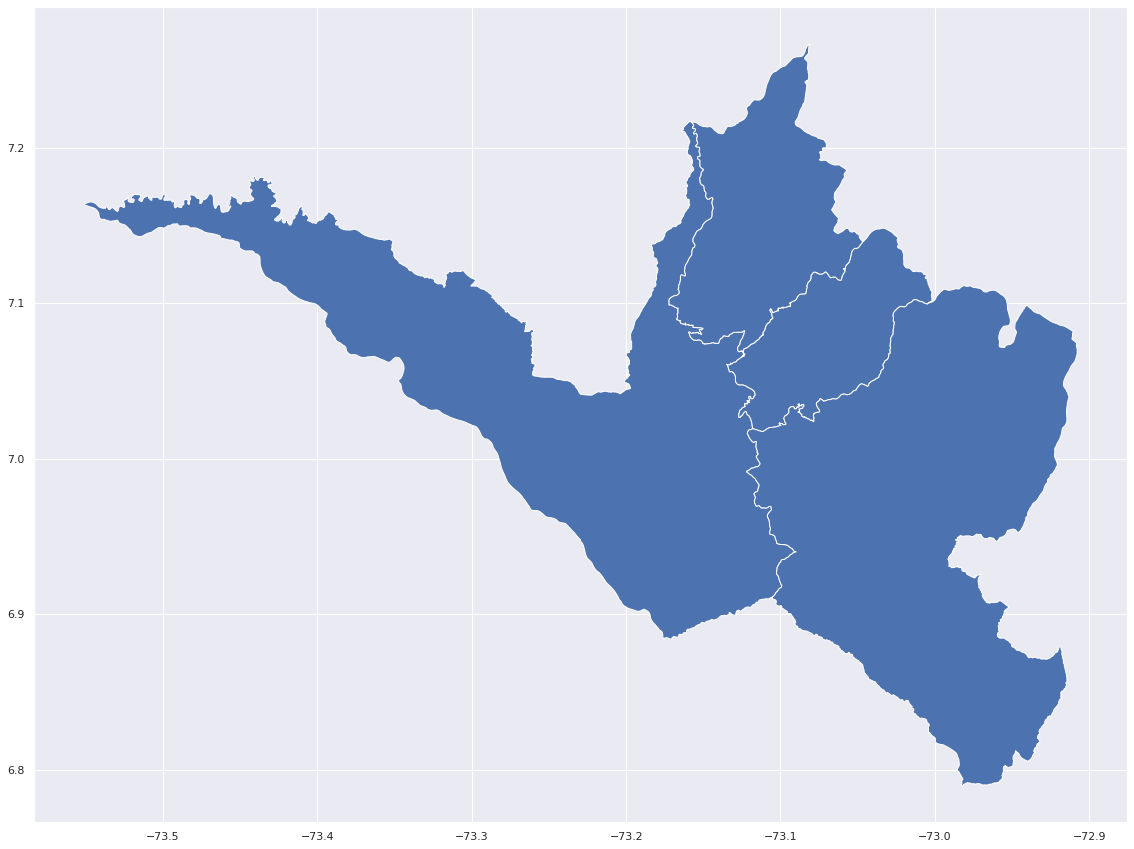

In [31]:
#Lets plot cities shapes
fig, ax = plt.subplots(1, 1, figsize=(25, 15))
municipios.plot(ax=ax)

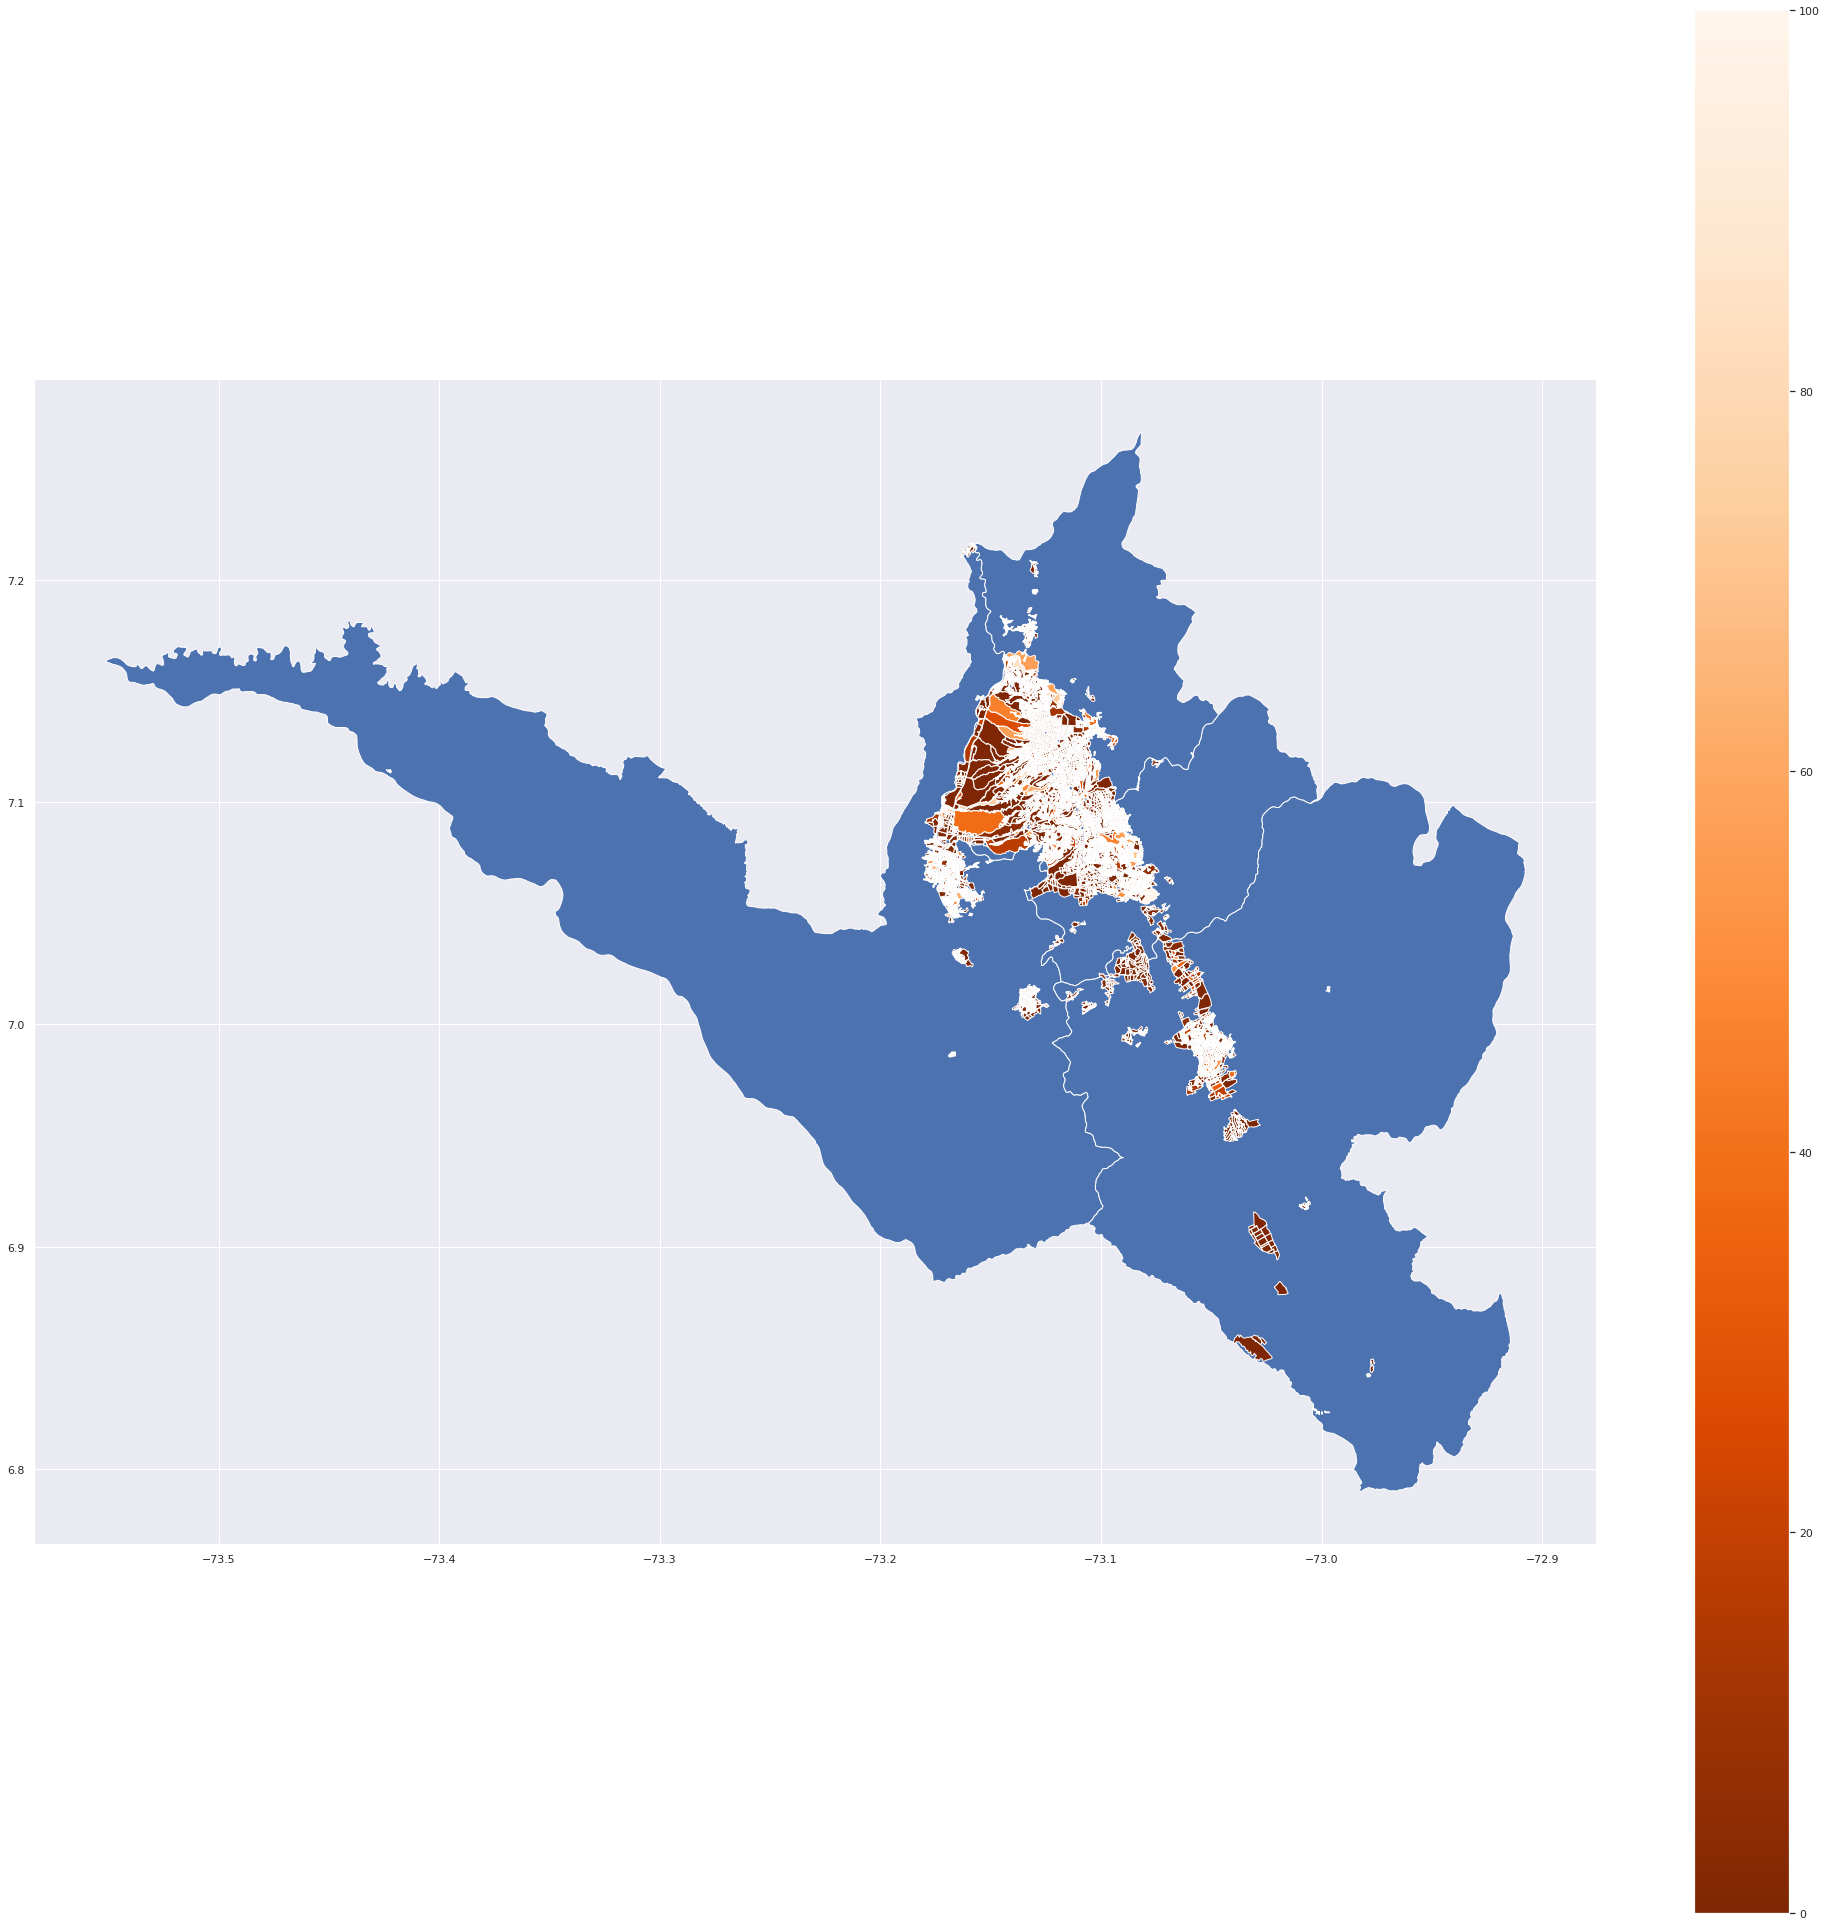

In [33]:
#Lets see cities shape and MPI per block 
fig, ax = plt.subplots(1, 1, figsize=(35, 35))
municipios.plot(ax=ax)
vulnerabilidad_manzanas_area_bucaramanga.plot(ax=ax, column='ipm', legend=True, cmap='Oranges_r')

Shapes of neighborhoods of bucaramanga are also available. Lets plot it.

In [36]:
barrios = gpd.read_file('/content/drive/MyDrive/Team 111 DS4A - Project/Data/Barrios bga')

In [39]:
#Dataset contains neighborhood names and commune number
barrios.head()

,OBJECTID,NOMBRE,CATEGORIA,FASE,Comuna,CntLumina,count(*),sum(NEAR_D,Dispro_mtr,barrio_2,geometry
0,75,12 DE OCTUBRE,BARRIO,1,04 - COMUNA OCCIDENTAL,69.0,26.0,404.702830,15.565493,None,"POLYGON ((-73.13641 7.11880, -73.13633 7.11882..."
1,131,13 DE JUNIO,BARRIO,0,None,NaN,37.0,672.263247,18.169277,None,"POLYGON ((-73.13098 7.15081, -73.13102 7.15072..."
2,76,23 DE JUNIO,BARRIO,1,04 - COMUNA OCCIDENTAL,61.0,52.0,780.325646,15.006262,None,"POLYGON ((-73.13718 7.11779, -73.13717 7.11781..."
3,247,5 DE ENERO,A. URBANO,0,None,0.0,16.0,216.210045,13.513128,None,"POLYGON ((-73.17133 7.10189, -73.17144 7.10175..."
4,58,ALARCON,BARRIO,1,03 - COMUNA SAN FRANCISCO,210.0,148.0,2776.524036,18.760298,None,"POLYGON ((-73.11923 7.12735, -73.11929 7.12728..."


In [38]:
barrios.shape

(267, 11)

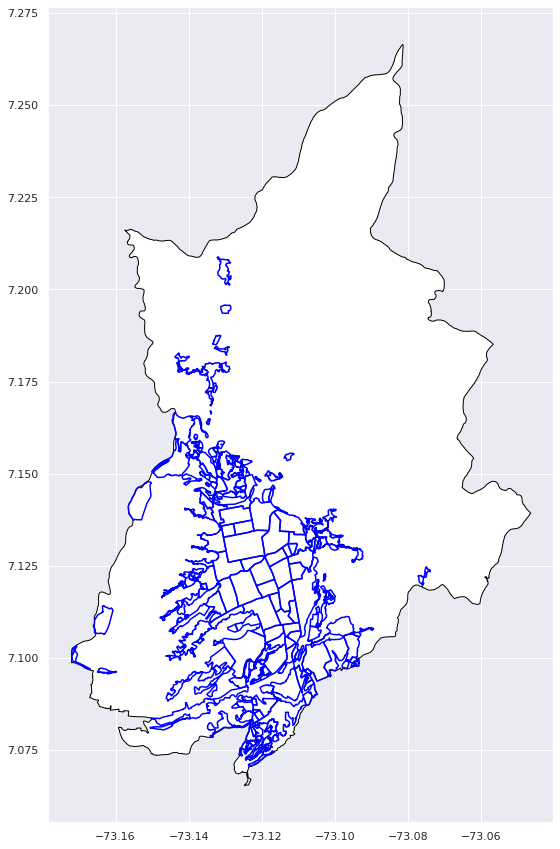

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
bga.plot(ax=ax, facecolor="white", edgecolor="black")
barrios.boundary.plot(ax=ax, facecolor="none", edgecolor="blue")



In [40]:
#single polygons of blocks are also available (lighter dataset)
manzanas = gpd.read_file('/content/drive/MyDrive/Team 111 DS4A - Project/Data/MGN2021_URB_MANZANA')

In [45]:
#Lets filter again
lista_cod_municipios = ['68307', '68276', '68547', '68001']
manzanas = manzanas[manzanas['COD_MPIO'].isin(lista_cod_municipios)]
manzanas_bga = manzanas[manzanas['COD_MPIO'] == '68001']
manzanas.shape

(11756, 27)

In [46]:
manzanas.head()

,COD_DPTO,COD_MPIO,COD_CLASE,COD_CPOB,COD_SECC,COD_DANE,COD_AG,TIPO_CTSTR,COD_CTSTR,ANO_VGNC,CID,CFE,TIPO_UCU,FUEN_ACTLZ,TIPO_IMGN,ANO_FUENTE,TIPO_ACTLZ,ANO_ACTLZ,REVI_CAMPO,LATI,LONG,VIV,HOG,PER,SHAPE_Leng,SHAPE_Area,geometry
390126,68,68001,1,68001000,68001100000000010101,6800110000000001010102,739977,4,6800101060180,2021,None,None,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0.002425,2.461614e-07,"POLYGON ((-73.13233 7.15481, -73.13233 7.15469..."
390127,68,68001,1,68001000,68001100000000010101,6800110000000001010107,739978,4,6800101060509,2021,None,21,0,1,1,2018,5,2020,1,0.0,0.0,0,0,0,0.009127,1.931546e-06,"POLYGON ((-73.13229 7.15589, -73.13226 7.15591..."
390128,68,68001,1,68001000,68001100000000010101,6800110000000001010115,739979,4,6800101060186,2021,None,None,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0.002339,2.613542e-07,"POLYGON ((-73.13330 7.15650, -73.13330 7.15650..."
390129,68,68001,1,68001000,68001100000000010101,6800110000000001010116,739980,4,6800101060185,2021,None,None,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0.002333,2.734908e-07,"POLYGON ((-73.13355 7.15565, -73.13362 7.15560..."
390130,68,68001,1,68001000,68001100000000010101,6800110000000001010117,739981,4,6800101060183,2021,None,None,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0.001600,1.514202e-07,"POLYGON ((-73.13275 7.15587, -73.13271 7.15581..."


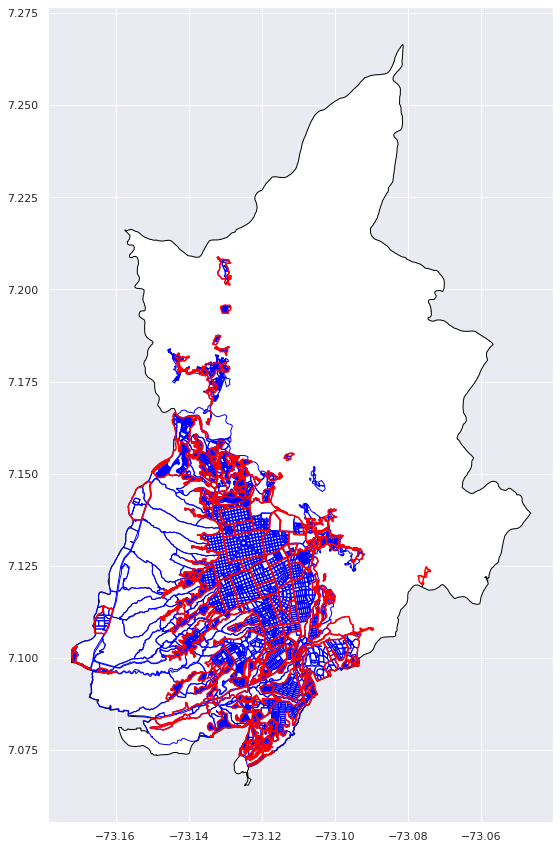

In [49]:
#Plot Bucaramanga, neighborhood and blocks shapes together
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
bga.plot(ax=ax, facecolor="white", edgecolor="black")
barrios.boundary.plot(ax=ax, facecolor="none", edgecolor="red")
manzanas_bga.plot(ax=ax, facecolor="none", edgecolor="blue")